# Predict Credit Card Fraud

## 1 Credit Card Fraud Detection Dataset

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

## 2 Environment and Dataset Preparation

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RepeatedKFold    
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [4]:
print(f"Number of total NaN value in the dataset: {df.isna().sum().sum()}")

Number of total NaN value in the dataset: 0


## 3 Exploratory Data Analysis

### 3.1 Class Distribution Visualization

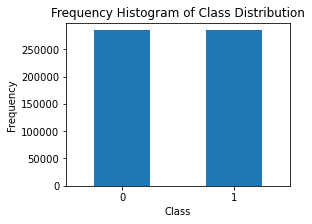

In [5]:
import matplotlib.pyplot as plt

# Plot a frequency histogram
plt.figure(figsize=(4, 3))
df['Class'].value_counts().plot(kind='bar')
plt.title('Frequency Histogram of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### 3.2 Outlier Detection

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound))
outlier_counts = outliers.sum()

print("Outlier counts in each column:")
print(outlier_counts)

Outlier counts in each column:
id            0
V1           30
V2        43620
V3         4300
V4         2766
V5        71015
V6        48854
V7        55997
V8        93856
V9        18939
V10       10710
V11         709
V12         700
V13        4197
V14        1088
V15        6780
V16        4546
V17       14890
V18       16676
V19       19519
V20       65708
V21       57138
V22       13706
V23       72056
V24        2029
V25       28089
V26        6554
V27       82235
V28       70242
Amount        0
Class         0
dtype: int64


### 3.3 Principal Component Analysis

#### 3.3.1 2D PCA Visualization

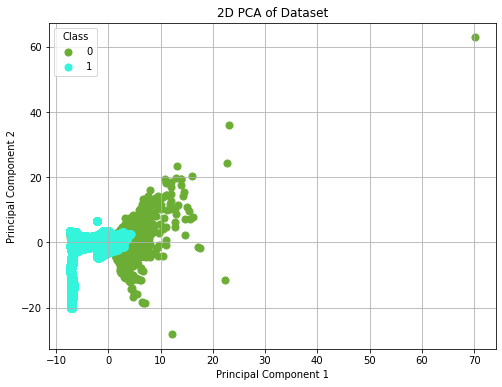

In [7]:
# Separate features and target
X = df.drop(['Class', 'id'], axis=1)
y = df['Class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y

plt.figure(figsize=(8, 6))
colors = np.random.rand(len(pca_df['Class'].unique()), 3)
for target, color in zip(pca_df['Class'].unique(), colors):
    indices_to_keep = pca_df['Class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'Principal Component 1'],
                pca_df.loc[indices_to_keep, 'Principal Component 2'],
                c=[color],
                s=50,
                label=target)

plt.title('2D PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

#### 3.3.2 PCA Variance Analysis

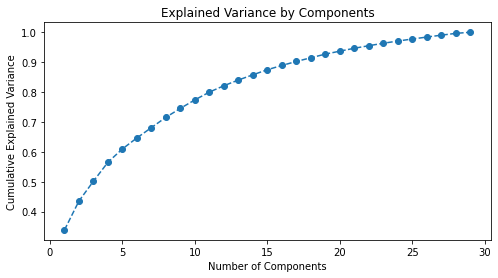

The number of components to reach 95% variance is: 22


In [8]:
# Apply PCA
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

# Explained Variance Plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

cumulative_variance = explained_variance.cumsum()
components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"The number of components to reach 95% variance is: {components_95}")

### 3.4 Correlation Matrix Analysis

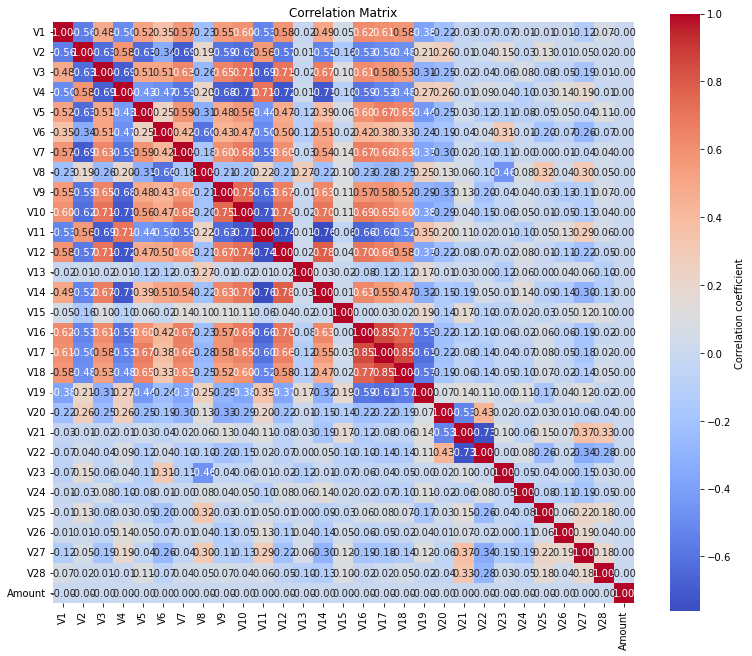

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.drop(["Class", "id"], axis=1).corr()


plt.figure(figsize=(13, 11))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar_kws={'label': 'Correlation coefficient'}, square=True)
plt.title('Correlation Matrix')
plt.show()

### 3.5 Observations

- All feature columns are numerical with target column having binary labels.
- No NaN values present.
- The categories in the target column ```Class``` are evenly distributed.
- The amount of outliers in each column are not uniformly distributed.
- In the 2D PCA visualization, there are some data points far removed from the main clusters (notably a few points far to the right). These could be outliers or atypical observations.
- In the PCA variance analysis, the number of component to reach 95% variance is 22.
- Since the data are anonymized, we will focus on predictive accuracy rather than interpretive analysis. In this case, some correlated features might be tolerable as they could still improve model performance, so a more conservative threshold of 0.85 is used to identify highly correlated features. Only ```V17``` and ```V18``` has a correlation of 0.85.

## 4 Model Deployment

In [10]:
df_metrics = pd.DataFrame(columns=['Model', 'kfold train acc', 'kfold test acc', 'kfold log loss',
                                  'testing acc', 'testing log loss'])
df_metrics['Model'] = ['Logistic Regression', 'Logistic Regression w PCA', 'Logistic Regression w/o V17', 'Random Forest']

In [11]:
def model_validation_classification(df, base_model, model_name, cv_splits, cv_repeats, split_test_size, split_random_state, 
                                    feature_remove=['none'], if_pca=True, n_pca=3):
    X = df.drop(columns=["Class", "id"])
    y = df['Class']
    
    if feature_remove != ['none']:
        X = X.drop(columns=feature_remove)
    
    # Split the data into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=split_random_state)
    
    # Initiate k-fold cross-validation
    cv = RepeatedKFold(n_splits=cv_splits, random_state=47, n_repeats=cv_repeats)
    splitting = cv.split(X=X_train, y=y_train)
    
    train_accuracies = []
    test_accuracies = []
    confusion_matrices = []
    log_losses = []
    for train_index, test_index in splitting:
        X_subtraining = X_train.iloc[train_index, :]
        X_subtesting = X_train.iloc[test_index, :]
        y_subtraining = y_train.iloc[train_index]
        y_subtesting = y_train.iloc[test_index]

        # Normalize the data
        scaler_model = StandardScaler()
        scaler_model.fit(np.array(X_subtraining))
        X_subtraining = scaler_model.transform(np.array(X_subtraining))
        X_subtesting = scaler_model.transform(np.array(X_subtesting))

        # Conduct PCA with specified n_components
        if if_pca:
            # Apply PCA transformation based on the subtraining dataset
            pca = PCA(n_components=n_pca)
            pca.fit(X_subtraining)
            X_subtraining = pca.transform(X_subtraining)
            X_subtesting = pca.transform(X_subtesting)

        # Train model based on the subtraining dataset
        base_model.fit(X=X_subtraining, y=y_subtraining)
        
        # Model validation on the substesting dataset
        y_pred = base_model.predict(X_subtesting)
        y_pred_proba = base_model.predict_proba(X_subtesting)
        
        train_accuracy = base_model.score(X=X_subtraining, y=y_subtraining)
        test_accuracy = base_model.score(X=X_subtesting, y=y_subtesting)
        test_log_loss = log_loss(y_true=y_subtesting, y_pred=y_pred_proba)
        test_confusion_matrix = confusion_matrix(y_true=y_subtesting, y_pred=y_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        log_losses.append(test_log_loss)
        confusion_matrices.append(test_confusion_matrix)

        ave_train_accuracy = np.mean(train_accuracies)
        ave_test_accuracy = np.mean(test_accuracies)  
        ave_log_loss = np.mean(log_losses)
        ave_test_confusion_matrix = np.sum(confusion_matrices, axis=0)/len(confusion_matrices)
        
    # Evaluate on the testing dataset
    # Normalize the data
    scaler_model = StandardScaler()
    scaler_model.fit(np.array(X_train))
    X_train = scaler_model.transform(np.array(X_train))
    X_test = scaler_model.transform(np.array(X_test))
    
    # Conduct PCA with specified n_components
    if if_pca:
        # Apply PCA transformation based on the subtraining dataset
        pca = PCA(n_components=n_pca)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
    base_model.fit(X=X_train, y=y_train)
    y_pred = base_model.predict(X_test)
    y_pred_proba = base_model.predict_proba(X_test)
    
    test_accuracy = base_model.score(X=X_test, y=y_test)
    model_log_loss = log_loss(y_true=y_test, y_pred=y_pred_proba)
    test_confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    df_metrics.iloc[df_metrics.index[df_metrics['Model'] == model_name], 1:] = [ave_train_accuracy, ave_test_accuracy, ave_log_loss, test_accuracy, model_log_loss]
    
    # Print evaluation results
    print(f"""K-Fold Cross-Validation Results:\ntrain_accuracy: {ave_train_accuracy}\ntest_accuracy: {ave_test_accuracy}\nlog_loss: {ave_log_loss}""") 
    print(f"""\nPerformance on the Testing Dataset:\ntest_accuracy: {test_accuracy}\nlog_loss: {model_log_loss}""")
    
    # Print confusion matrices
    fig, axes = plt.subplots(1, 2)
    plt.rcParams["figure.figsize"] = [10, 6]
    plt.rcParams["figure.autolayout"] = True
    ConfusionMatrixDisplay(ave_test_confusion_matrix).plot(ax=axes[0])
    axes[0].set_title('K-Fold Average Test Confusion Matrix')
    ConfusionMatrixDisplay(test_confusion_matrix).plot(ax=axes[1])
    axes[1].set_title('Testing Dataset Confusion Matrix')
    plt.show()

### 4.1 Logistic Regression

#### 4.1.1 Vanilla Model

K-Fold Cross-Validation Results:
train_accuracy: 0.9649105452639146
test_accuracy: 0.9648951572702265
log_loss: 0.09450738128298838

Performance on the Testing Dataset:
test_accuracy: 0.9650123982202838
log_loss: 0.0933304161623862


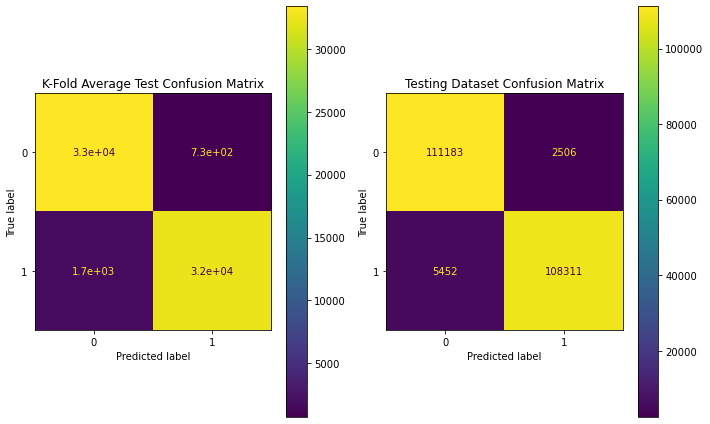

In [17]:
model_validation_classification(df=df, base_model=LogisticRegression(), model_name='Logistic Regression',
                                cv_splits=5, cv_repeats=1, split_test_size=.4, split_random_state=47,
                                feature_remove=['none'], if_pca=False, n_pca=0)

#### 4.1.2 Adding PCA

K-Fold Cross-Validation Results:
train_accuracy: 0.9619502138275801
test_accuracy: 0.9619465514477697
log_loss: 0.10149538980047959

Performance on the Testing Dataset:
test_accuracy: 0.962075514833899
log_loss: 0.10051124395543123


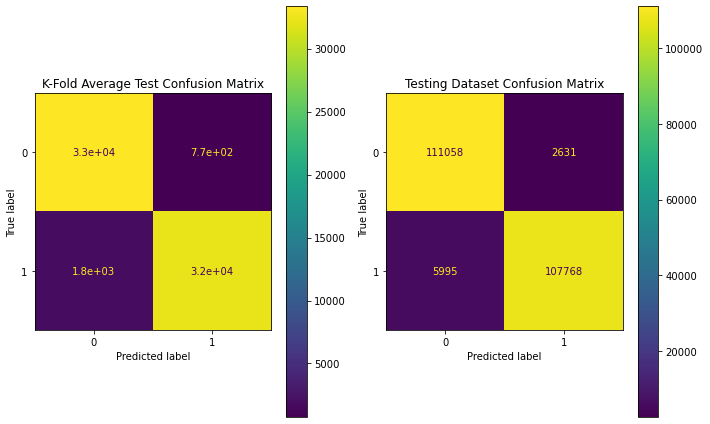

In [13]:
model_validation_classification(df=df, base_model=LogisticRegression(), model_name='Logistic Regression w PCA',
                                cv_splits=5, cv_repeats=1, split_test_size=.4, split_random_state=47,
                                feature_remove=['none'], if_pca=True, n_pca=22)

#### 4.1.3 Removing Correlated Feature

K-Fold Cross-Validation Results:
train_accuracy: 0.9618908605395948
test_accuracy: 0.9618556888582921
log_loss: 0.09912895102261056

Performance on the Testing Dataset:
test_accuracy: 0.9617413784007175
log_loss: 0.09805688969223844


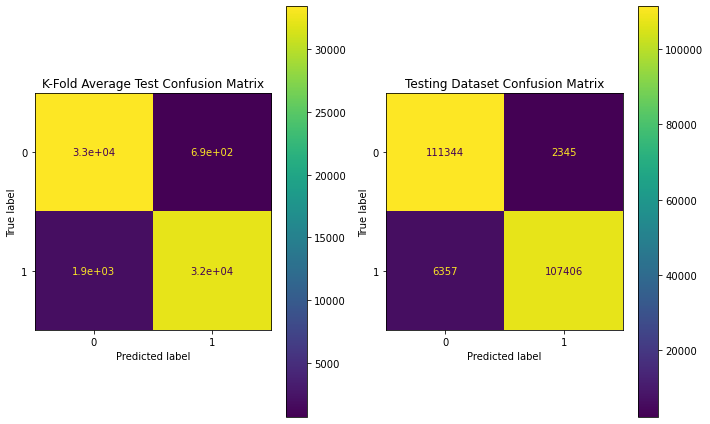

In [14]:
model_validation_classification(df=df, base_model=LogisticRegression(), model_name='Logistic Regression w/o V17',
                                cv_splits=5, cv_repeats=1, split_test_size=.4, split_random_state=47,
                                feature_remove=['V17'], if_pca=False, n_pca=0)

### 4.2 Random Forest

K-Fold Cross-Validation Results:
train_accuracy: 1.0
test_accuracy: 0.9998387939979066
log_loss: 0.005353007460206931

Performance on the Testing Dataset:
test_accuracy: 0.9998505179114714
log_loss: 0.004464974059821469


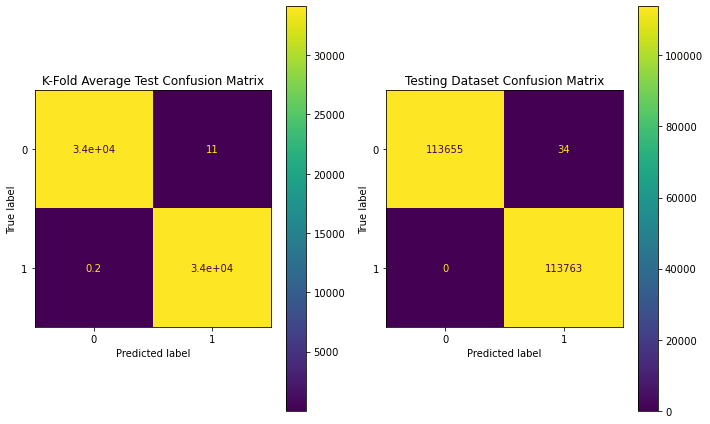

In [15]:
model_validation_classification(df=df, base_model=RandomForestClassifier(n_estimators=200, random_state=47, n_jobs=-1), 
                                model_name='Random Forest', cv_splits=5, cv_repeats=1, split_test_size=.4, split_random_state=47,
                                feature_remove=['none'], if_pca=False, n_pca=0)

## 5 Conclusion

- In terms of k-fold test set accuracy and test time accuracy, approaches of adding PCA and removing highly correlated feature fail to improve the performance of the logistic regression model.
- The random forest model achieved 99.98% on both k-fold test set accuracy and test time accuracy, which is a very solid performance that does not require further fine-tuning with GridSearch

In [16]:
df_metrics

,Model,kfold train acc,kfold test acc,kfold log loss,testing acc,testing log loss
0,Logistic Regression,0.964911,0.964895,0.094507,0.965012,0.09333
1,Logistic Regression w PCA,0.96195,0.961947,0.101495,0.962076,0.100511
2,Logistic Regression w/o V17,0.961891,0.961856,0.099129,0.961741,0.098057
3,Random Forest,1.0,0.999839,0.005353,0.999851,0.004465
